In [1]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
%matplotlib notebook

In [2]:
basepath = '/Users/blandt/Desktop/Data/Optogenetics/Optogenetics December 2021/Experiment'
paths = direcslist(basepath, 2)

imgs = [load_image(p + '/rfp_channel_flat.tif') for p in paths]
rois = [np.loadtxt(p + '/ROI_fit.txt') for p in paths]

In [3]:
cytbg = np.loadtxt('../T2A/cytbg.txt')
membg = np.loadtxt('../PAR2 RING MUTANTS/mem_profile.txt')

iq = ImageQuant(img=imgs, cytbg=cytbg, membg=membg, roi=rois, uni_cyt=False, descent_steps=1200, iterations=1, 
                rol_ave=5, lr=0.01, interp_type='linear')
iq.run()

100%|██████████| 1200/1200 [01:36<00:00, 12.45it/s]


Time elapsed: 97.13 seconds 


<IPython.core.display.Javascript object>


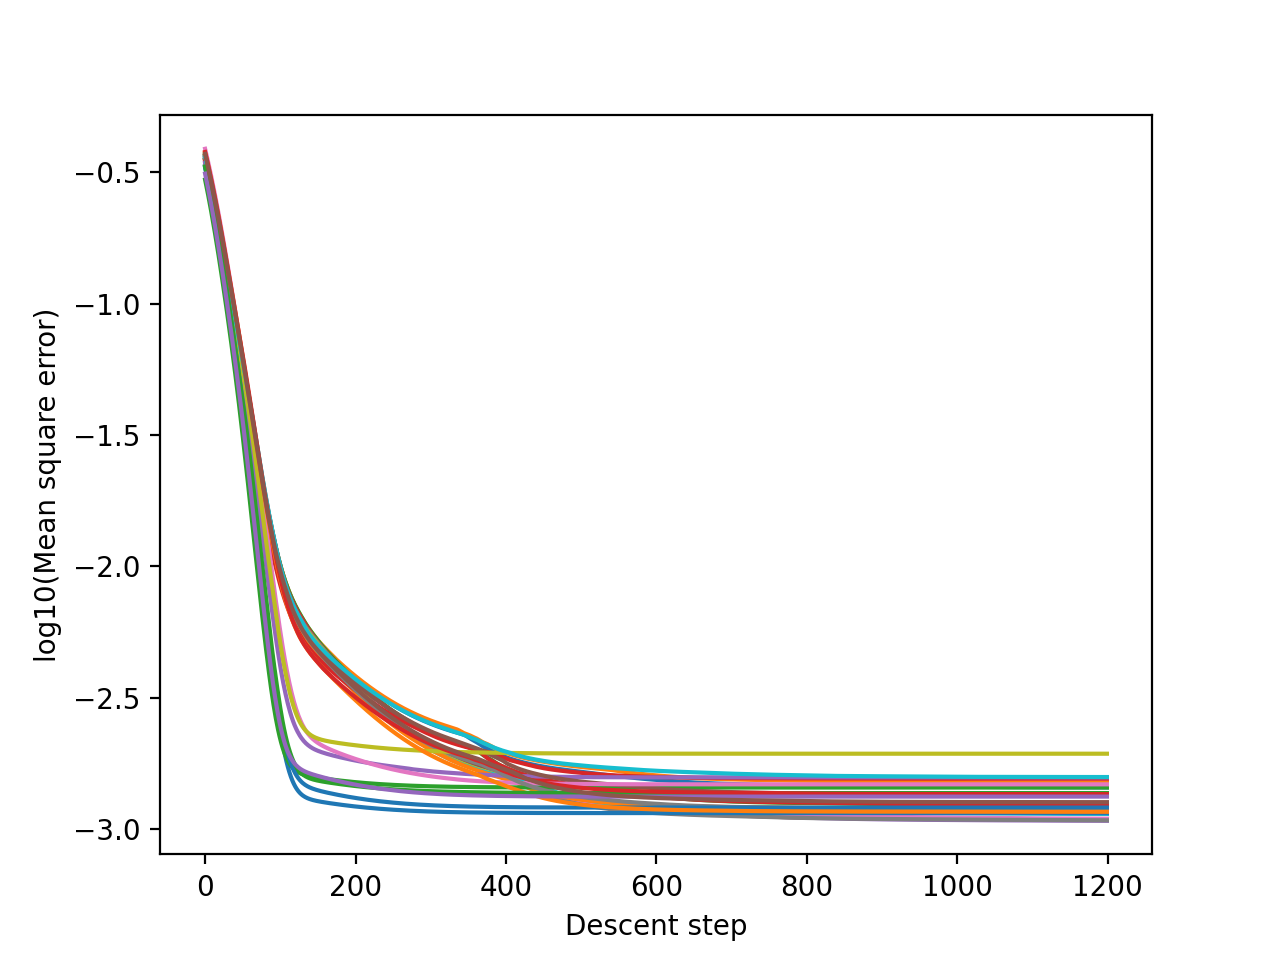

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

In [8]:
iq.plot_losses(log=True)

<IPython.core.display.Javascript object>


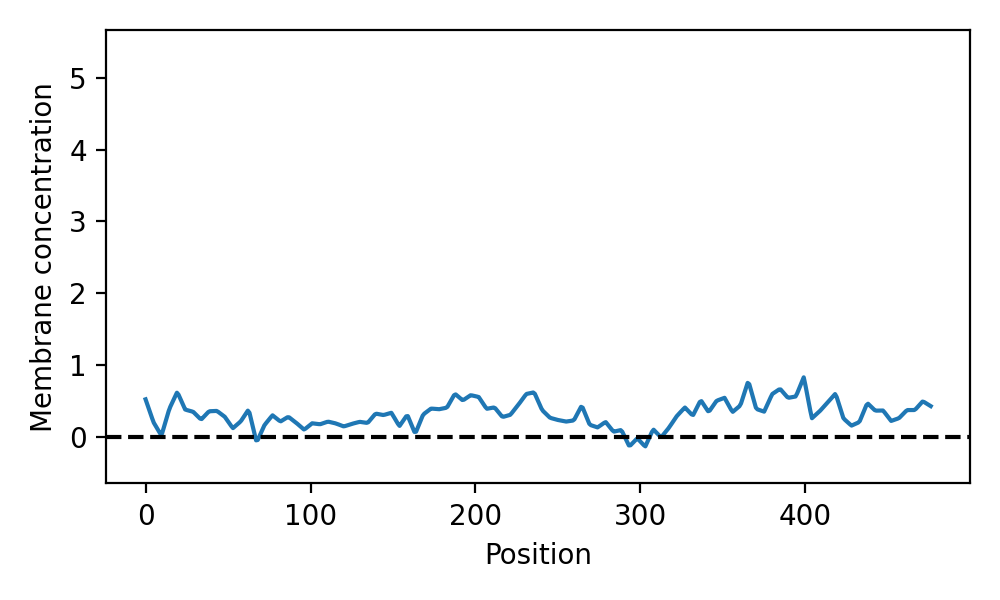

interactive(children=(IntSlider(value=0, description='Frame', max=25), Output()), _dom_classes=('widget-intera…

(<Figure size 500x300 with 1 Axes>,
 <AxesSubplot:xlabel='Position', ylabel='Membrane concentration'>)

In [9]:
iq.plot_quantification(jupyter=True)

In [10]:
res = iq.compile_res()
res.to_csv('res.csv')

In [11]:
res = pd.read_csv('res.csv')
mems = res.groupby('Frame').apply(lambda x: np.mean(x['Membrane signal']))
cyts = res.groupby('Frame').apply(lambda x: np.mean(x['Cytoplasmic signal']))
pre_post = [p.split('/')[-1] for p in paths]
embryos = [p.split('/')[-2] for p in paths]
lines = [p.split('/')[-3].split('_')[1] for p in paths]

df_dict = {'Line': lines, 'Embryo': embryos, 'Exposure': pre_post, 'Membrane': mems, 'Cytoplasm': cyts}
df = pd.DataFrame(df_dict)

pre = df.groupby(['Line', 'Embryo']).last()
post = df.groupby(['Line', 'Embryo']).first()
df = pd.DataFrame({'mem_pre': pre.Membrane, 
                   'mem_post': post.Membrane, 'cyt_pre': pre.Cytoplasm, 
                   'cyt_post': post.Cytoplasm})
df.to_csv('df.csv')